In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

## First we will read the data from the csv file as a pandas dataframe

In [3]:
loan=pd.read_csv('loan_data.csv')
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### So we have to predict whether the borrower paid the loan in full or not which is given by the values of not.fully.paid column of this dataframe where 0 stands for not paid and 1 for fully paid   

## Now we will check the info and description of this dataframe

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### There are no missing data  or null values in this dataframe.It consists of 9578 rows and 14 columns 

In [5]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Data visualisation

### First let us check the fico score of people of with different credit policies.People with credit policy 1 meet the credit criteria whereas people with credit score 0 do not meet the criteria

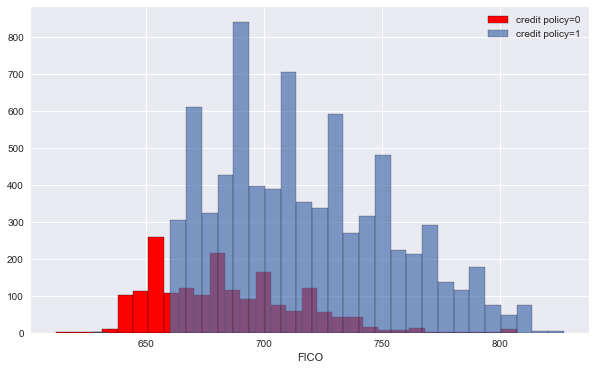

In [6]:
plt.figure(figsize=(10,6))
plt.xlabel("FICO")
plt.hist(x=loan[loan['credit.policy']==0]['fico'],label='credit policy=0',color='red',edgecolor='black',bins=30)
plt.hist(x=loan[loan['credit.policy']==1]['fico'],label='credit policy=1',alpha=0.7,edgecolor='black',bins=30)
plt.legend()

## Let us make our Machine Learning Model and fit it with testing data

##### These are our features according to which we have to train our data-credit.policy,purpose,int.rate,installment,log.annual.inc	dti	fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec.We have to predict the values of label not.fully.paid.The purpose feature of this dataframe is a categorical which our machine learning model will not accept.So we have to convert it into a numerical by assigning dummy variables to these categorical values.

In [7]:
cat_feats=['purpose']

Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.

In [8]:
final_data=pd.get_dummies(loan,columns=['purpose'],drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Now we split our data into training and testing set using train test split and train and predict

In [9]:
Y=final_data['not.fully.paid']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(final_data.drop('not.fully.paid',axis=1),Y,test_size=0.3,random_state=101)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
dtree=DecisionTreeClassifier()

In [146]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Now let us make predictions

In [147]:
predict=dtree.predict(x_test)

In [148]:
from sklearn.metrics import classification_report,confusion_matrix

In [149]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.86      0.82      0.84      2431
          1       0.20      0.24      0.22       443

avg / total       0.75      0.73      0.74      2874



In [150]:
print(confusion_matrix(y_test,predict)) #confusion matrix

[[2003  428]
 [ 338  105]]


In [151]:
from sklearn.metrics import accuracy_score

In [152]:
accuracy_score(y_test,predict)

0.73347251217814891

### From the here we can see that the accuracy is 73.33% which is not great as we used a single decision tree.If use Random Forests classifier it will perform the above classfication using an ensemble of trees and our accuracy will improve

#### Lets perform the above steps using Random Forests

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
random=RandomForestClassifier(n_estimators=200)

In [22]:
random.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [23]:
random_predict=random.predict(x_test)

In [26]:
print(classification_report(y_test,random_predict))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.59      0.02      0.04       443

avg / total       0.81      0.85      0.78      2874



In [34]:
print(confusion_matrix(y_test,random_predict))

[[2424    7]
 [ 433   10]]


In [35]:
accuracy_score(y_test,random_predict)

0.84690327070285321

### From here we can see that accuracy has improved to 84.69% but it is not enough.